In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline #matplotlibの図をJupyter Notebook上で表示するためのマジックコマンド

In [ ]:
#Kaggleは3パターン→データに強い/モデルに強い/ひたすらPDCA回すのが速い
#機械学習は、モデルを作り企業に説明するパターンが多い。スコア精度以外に、データサイエンティストとしては要因深堀が重要

In [48]:
test = pd.read_csv("test.csv")
test.tail()

,index,Order,MS SubClass,MS Zoning,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Exter Qual,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition
1995,3138,2447,120,RL,3907,IR1,Lvl,Inside,StoneBr,1Fam,1Story,8,5,2006,2002,Gable,VinylSd,CmentBd,Gd,PConc,562.267832,-0.001299,526.636360,1242.211251,Ex,Y,SBrkr,1337,0,1728,0.002000,-0.001999,2,0,3,1,Gd,8,1,1.998003,641.261977,Y,0,0,6,2007,WD,Normal
1996,191,27,120,RL,3907,IR1,Lvl,Inside,Mitchel,1Fam,1Story,6,5,2006,2007,Gable,HdBoard,CmentBd,Gd,PConc,1566.140763,-0.001331,214.618116,1269.312702,TA,Y,SBrkr,1646,0,1728,1.001999,-0.002000,1,0,2,1,Gd,4,1,1.998007,387.032024,Y,0,0,7,2008,WD,Normal
1997,3294,208,50,RL,6000,Reg,Lvl,Inside,Crawfor,1Fam,1.5Fin,4,6,1993,1950,Gable,MetalSd,MetalSd,TA,CBlock,540.277638,-0.001226,473.226887,591.167928,Ex,Y,SBrkr,864,0,864,0.001999,-0.001997,2,0,3,1,TA,6,0,1.998007,406.608942,Y,0,0,7,2009,WD,Normal
1998,3073,1293,120,RL,1680,Reg,Lvl,Inside,Edwards,1Fam,1Story,5,5,1976,2006,Gable,VinylSd,VinylSd,TA,PConc,0.001131,-0.001244,1121.285286,616.777786,TA,Y,SBrkr,1337,0,1728,0.002000,-0.001998,1,0,3,1,TA,5,1,-0.001999,-0.001395,Y,0,0,6,2009,WD,Normal
1999,361,1027,20,RL,7200,Reg,Lvl,Inside,NAmes,1Fam,1Story,5,5,1963,1950,Gable,VinylSd,VinylSd,TA,CBlock,556.217496,-0.001226,488.442867,621.875100,Ex,Y,SBrkr,1098,0,848,1.001999,-0.001999,2,0,3,1,TA,5,0,1.998003,379.578413,Y,0,0,7,2007,WD,Normal


In [49]:
train = pd.read_csv("train.csv")
train

,index,Order,MS SubClass,MS Zoning,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Exter Qual,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,200,2163,20,RL,9000,Reg,Lvl,Inside,NAmes,1Fam,1Story,5,5,1963,1950,Gable,VinylSd,VinylSd,TA,CBlock,554.725259,-0.001226,490.862838,620.339061,Ex,Y,SBrkr,941,0,2358,1.001999,-0.001999,2,0,3,1,TA,5,0,1.998003,381.014258,Y,0,0,7,2007,WD,Normal,158000
1,3832,1862,20,RL,9600,Reg,Lvl,Inside,CollgCr,1Fam,1Story,7,5,2006,2006,Gable,VinylSd,VinylSd,Gd,PConc,514.217911,-0.001230,1711.943709,1286.011022,Ex,Y,SBrkr,894,0,1040,0.002000,-0.001999,2,0,3,1,Gd,6,0,1.998003,384.114652,Y,0,0,11,2007,WD,Normal,145000
2,4927,754,20,RL,9600,Reg,Lvl,Inside,NridgHt,1Fam,1Story,9,5,2007,2007,Hip,VinylSd,VinylSd,Gd,PConc,1596.991227,-0.001151,511.217197,1341.741207,Ex,Y,SBrkr,864,0,864,1.001999,-0.001999,2,0,3,1,Gd,7,1,2.998015,625.140330,Y,0,0,5,2008,WD,Normal,125000
3,4088,641,80,RL,9600,Reg,Lvl,Inside,OldTown,1Fam,SLvl,6,6,1976,1950,Gable,VinylSd,Plywood,TA,CBlock,586.182353,-0.001260,469.685845,566.069609,Gd,Y,SBrkr,864,0,864,0.002000,-0.001999,1,0,3,1,TA,6,0,0.998002,193.156275,Y,0,0,7,2006,WD,Normal,135000
4,3644,754,20,RL,9600,Reg,Lvl,Inside,NoRidge,1Fam,1Story,7,5,1994,2002,Gable,VinylSd,VinylSd,Gd,PConc,1589.946047,-0.001204,484.337352,1258.013116,Ex,Y,SBrkr,832,0,1040,1.001998,-0.001999,2,0,3,1,Gd,7,1,2.998012,617.903766,Y,0,0,7,2007,WD,Normal,175000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,4931,27,120,RL,1680,Reg,Lvl,Inside,NridgHt,TwnhsE,1Story,5,5,2004,2004,Gable,VinylSd,VinylSd,TA,PConc,620.110745,-0.001221,511.080630,1163.794125,Ex,Y,SBrkr,1337,0,1728,0.002000,-0.001999,2,0,3,1,TA,6,0,1.998001,416.886419,Y,0,0,5,2009,WD,Normal,130000
2996,3264,2203,160,RL,2665,Reg,Lvl,Inside,MeadowV,1Fam,2Story,5,5,1970,1970,Gable,CemntBd,MetalSd,TA,PConc,0.001057,-0.001225,480.872842,543.789909,Ex,Y,SBrkr,1040,0,1040,0.001999,-0.001997,1,1,3,1,TA,6,0,1.998004,371.721904,Y,0,0,5,2006,WD,Normal,140000
2997,1653,2447,20,RL,7200,Reg,Lvl,Inside,NAmes,1Fam,1Story,5,5,1963,1950,Gable,VinylSd,VinylSd,TA,CBlock,554.523591,-0.001225,488.283374,621.223013,Ex,Y,SBrkr,1098,0,2358,1.001999,-0.001999,2,0,3,1,TA,5,0,1.998003,379.306321,Y,0,0,7,2007,WD,Normal,158000
2998,2607,378,60,FV,9000,Reg,Lvl,Inside,Somerst,1Fam,2Story,6,5,2005,1950,Gable,VinylSd,VinylSd,Gd,PConc,0.000872,-0.001221,504.687298,599.525621,Ex,Y,SBrkr,728,0,1456,0.001999,-0.001999,2,1,3,1,TA,7,1,1.998002,371.138581,Y,0,0,7,2007,WD,Normal,158000


In [6]:
#相関性表示
train.corr()

,index,Order,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,...,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
index,1.000000,0.014844,0.011907,-0.007316,-0.012457,-0.013080,0.007597,0.008230,0.003284,0.003378,...,0.002705,-0.001013,-0.004373,0.001672,0.002256,-0.012222,0.040450,0.012787,0.002732,-0.000678
Order,0.014844,1.000000,-0.142608,0.058401,-0.142547,-0.011252,-0.140260,-0.204108,-0.033367,-0.034037,...,-0.008537,-0.159181,-0.214332,-0.005872,-0.027835,-0.009706,-0.011636,0.067209,-0.035379,0.033780
MS SubClass,0.011907,-0.142608,1.000000,-0.262511,0.117311,0.000120,0.189846,0.172068,-0.098091,-0.044578,...,0.111800,0.124201,0.166458,-0.035777,-0.036941,0.009161,0.011741,-0.027597,0.020968,0.024983
Lot Area,-0.007316,0.058401,-0.262511,1.000000,0.155995,0.002566,0.097686,0.030041,-0.013073,0.006987,...,-0.043058,0.168343,0.101933,0.254253,0.217515,0.028743,0.037658,-0.047126,-0.046868,0.075765
Overall Qual,-0.012457,-0.142547,0.117311,0.155995,1.000000,-0.038243,0.387708,0.335841,0.166006,-0.049758,...,-0.024042,0.411097,0.450922,0.438722,0.436780,0.015274,0.026617,-0.159349,0.047975,0.149422
Overall Cond,-0.013080,-0.011252,0.000120,0.002566,-0.038243,1.000000,-0.088926,-0.017582,-0.003089,-0.015785,...,-0.007808,0.062384,0.023480,-0.126929,-0.113621,-0.007808,-0.014239,0.045500,0.091095,-0.053452
Year Built,0.007597,-0.140260,0.189846,0.097686,0.387708,-0.088926,1.000000,0.441941,0.142944,-0.031420,...,0.015035,0.204539,0.310091,0.380645,0.360274,0.017521,0.041639,-0.133049,-0.024461,0.221131
Year Remod/Add,0.008230,-0.204108,0.172068,0.030041,0.335841,-0.017582,0.441941,1.000000,0.144193,-0.029472,...,0.006102,0.209984,0.274835,0.244743,0.270898,0.028420,0.002129,-0.121642,0.043481,0.130724
BsmtFin SF 1,0.003284,-0.033367,-0.098091,-0.013073,0.166006,-0.003089,0.142944,0.144193,1.000000,-0.002051,...,0.011484,-0.126961,0.089887,0.215207,0.220688,-0.037829,-0.037665,-0.041391,0.097308,0.086038
BsmtFin SF 2,0.003378,-0.034037,-0.044578,0.006987,-0.049758,-0.015785,-0.031420,-0.029472,-0.002051,1.000000,...,-0.002145,-0.007335,-0.034987,-0.012959,-0.017959,-0.002145,-0.000043,-0.038960,0.040736,-0.037817


In [35]:
print(train.shape)
print("*"*50)
print(test.shape)
print("*"*50)
print(train.info())
print("*"*50)
print(test.info())

(3000, 120)
**************************************************
(2000, 120)
**************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Columns: 120 entries, index to Sale Condition_Partial
dtypes: float64(11), int64(21), uint8(88)
memory usage: 1.0 MB
None
**************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Columns: 120 entries, index to Sale Condition_Partial
dtypes: float64(11), int64(21), uint8(88)
memory usage: 687.5 KB
None


In [19]:
train.describe()

,index,Order,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,...,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2492.964667,1248.236333,48.396667,7602.694000,5.815333,5.107333,1979.900667,1976.471667,517.089283,1.678204,...,1.001000,6.080333,0.418333,1.818004,358.008090,0.100000,0.154667,6.387333,2007.235667,150288.542000
std,1447.218078,839.778012,40.079273,2412.498362,1.073133,0.434982,25.464595,26.939323,432.542348,24.776211,...,0.031612,0.972383,0.499413,0.652490,137.882480,3.161223,2.681257,1.268270,1.052852,31054.043412
min,0.000000,27.000000,20.000000,1680.000000,4.000000,3.000000,1900.000000,1950.000000,0.000298,-0.001880,...,1.000000,4.000000,0.000000,-0.001999,-0.001881,0.000000,0.000000,1.000000,2006.000000,80000.000000
25%,1218.750000,632.000000,20.000000,6000.000000,5.000000,5.000000,1963.000000,1950.000000,0.001216,-0.001247,...,1.000000,5.000000,0.000000,1.998001,368.150937,0.000000,0.000000,6.000000,2006.000000,139000.000000
50%,2465.500000,1097.000000,20.000000,8400.000000,6.000000,5.000000,1976.000000,1967.500000,554.581463,-0.001226,...,1.000000,6.000000,0.000000,1.998003,379.312837,0.000000,0.000000,6.000000,2007.000000,145000.000000
75%,3750.250000,2163.000000,60.000000,9600.000000,6.000000,5.000000,2005.000000,2006.000000,591.008914,-0.001214,...,1.000000,7.000000,1.000000,1.998004,392.790170,0.000000,0.000000,7.000000,2008.000000,158000.000000
max,4999.000000,2902.000000,190.000000,31250.000000,9.000000,8.000000,2009.000000,2009.000000,1680.095488,438.898861,...,2.000000,10.000000,2.000000,2.998023,895.134618,100.000000,48.000000,12.000000,2010.000000,418000.000000


/Users/obatakumi/.pyenv/versions/3.7.0/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

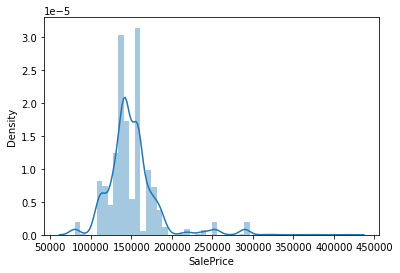

In [10]:
sns.distplot(train.SalePrice)

<AxesSubplot:xlabel='Full Bath', ylabel='SalePrice'>

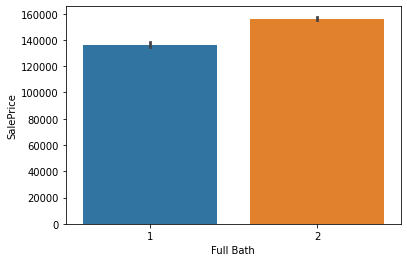

In [11]:
#相関性〜Full Bath〜
sns.barplot(data=train,x="Full Bath",y="SalePrice")

<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

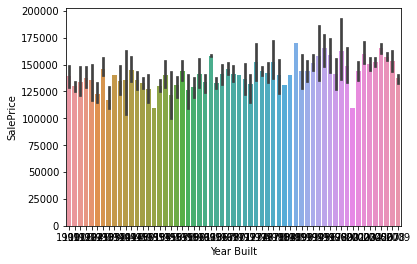

In [12]:
#相関性〜Year Built〜→サブプライムローン時は要反映！
sns.barplot(data=train,x="Year Built",y="SalePrice")

In [18]:
#Year Builtのターゲットエンコーディング
YearBuilt_mean = train.groupby('Year Built').SalePrice.mean()
YearBuilt_mean

Year Built
1900    139444.444444
1910    130011.363636
1916    133777.777778
1920    137893.617021
1924    135750.000000
1925    123000.000000
1930    146375.000000
1935    117500.000000
1938    140000.000000
1940    134714.285714
1941    135600.000000
1946    144666.666667
1948    135304.347826
1950    133117.186813
1951    127500.000000
1953    110000.000000
1954    130021.875000
1955    140565.217391
1956    121468.750000
1957    130909.090909
1958    143920.731707
1959    126666.666667
1960    129333.333333
1961    140977.777778
1962    134166.666667
1963    158311.444653
1966    132480.519481
1967    140872.133333
1968    145845.607843
1970    141604.166667
1971    140000.000000
1972    137000.000000
1973    131666.666667
1974    152200.000000
1976    143713.636364
1977    141916.666667
1978    152142.857143
1980    140363.636364
1984    131000.000000
1988    140000.000000
1989    170000.000000
1990    143900.000000
1993    143777.777778
1994    151875.881188
1995    158066.666667

In [73]:
#分割ターゲットエンコーディングにおいて、合計とカウントを集計！
agg_train = train.groupby('Year Built').agg({'SalePrice': ['sum', 'count']})

#3分割
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)

#生成した特徴量を入れる Series オブジェクトを用意しておく
ts = pd.Series(np.empty(train.shape[0]), index=train.index)

#ホールドアウト分を全体から除外した上で平均値を計算
for _, holdout_idx in folds.split(train, train.SalePrice):
     # ホールドアウトする行を取り出す
        holdout_train = train.iloc[holdout_idx]
     # ホールドアウトしたデータで合計とカウントを計算する
        holdout_agg_train = holdout_train.groupby('Year Built').agg({'SalePrice': ['sum', 'count']})
     # 全体の集計からホールドアウトした分を引く
        train_agg_train = agg_train - holdout_agg_train
     # ホールドアウトしたデータの平均値を計算していく
        oof_ts = holdout_train.apply(lambda row: train_agg_train.loc[row.Year Built][('SalePrice', 'sum')] \
                                           / train_agg_train.loc[row.category][('SalePrice', 'count')], axis=1)
     # 生成した特徴量を記録する
        ts[oof_ts.index] = oof_ts

SyntaxError: invalid syntax (<ipython-input-73-d43082e93556>, line 20)

In [69]:
train_agg_train

NameError: name 'train_agg_train' is not defined

In [59]:
agg_train.head()

SalePrice      
                  sum count
Year Built                 
1900        1255000.0     9
1910        8580750.0    66
1916        1204000.0     9
1920        6481000.0    47
1924         543000.0     4

In [60]:
ts

0        0.000000e+00
1       1.180817e-321
2        0.000000e+00
3       1.180817e-321
4       2.124482e-322
            ...      
2995    2.618548e-322
2996    1.432790e-322
2997    1.235164e-322
2998    2.667954e-322
2999    6.422853e-323
Length: 3000, dtype: float64

In [70]:
train.iloc

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

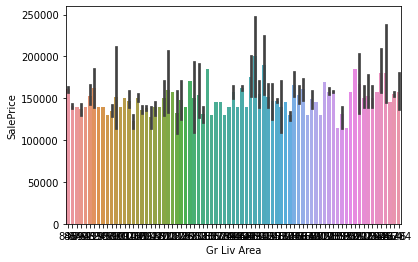

In [13]:
#説明変数相関性〜Gr Liv Area〜
sns.barplot(data=train,x="Gr Liv Area",y="SalePrice")

In [16]:
#Gr Liv Areaのターゲットエンコーディング
GrLivArea_mean = train.groupby('Gr Liv Area').SalePrice.mean()
GrLivArea_mean

Gr Liv Area
848     160598.130841
864     140396.913621
876     140000.000000
894     136666.666667
908     140000.000000
            ...      
2443    180580.000000
2462    180000.000000
2464    145000.000000
2646    155500.000000
2784    157500.000000
Name: SalePrice, Length: 77, dtype: float64

In [50]:
train_new = train

In [51]:
#ターゲットエンコーディングファイル作成
train_new = train_new.assign(YearBuilt_enc=train["Year Built"].map(YearBuilt_mean).copy())
train_new = train_new.assign(GrLivArea_enc=train_new["Gr Liv Area"].map(GrLivArea_mean).copy())

In [52]:
train_new

,index,Order,MS SubClass,MS Zoning,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Exter Qual,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,YearBuilt_enc,GrLivArea_enc
0,200,2163,20,RL,9000,Reg,Lvl,Inside,NAmes,1Fam,1Story,5,5,1963,1950,Gable,VinylSd,VinylSd,TA,CBlock,554.725259,-0.001226,490.862838,620.339061,Ex,Y,SBrkr,941,0,2358,1.001999,-0.001999,2,0,3,1,TA,5,0,1.998003,381.014258,Y,0,0,7,2007,WD,Normal,158000,158311.444653,158000.000000
1,3832,1862,20,RL,9600,Reg,Lvl,Inside,CollgCr,1Fam,1Story,7,5,2006,2006,Gable,VinylSd,VinylSd,Gd,PConc,514.217911,-0.001230,1711.943709,1286.011022,Ex,Y,SBrkr,894,0,1040,0.002000,-0.001999,2,0,3,1,Gd,6,0,1.998003,384.114652,Y,0,0,11,2007,WD,Normal,145000,165179.023873,150794.544529
2,4927,754,20,RL,9600,Reg,Lvl,Inside,NridgHt,1Fam,1Story,9,5,2007,2007,Hip,VinylSd,VinylSd,Gd,PConc,1596.991227,-0.001151,511.217197,1341.741207,Ex,Y,SBrkr,864,0,864,1.001999,-0.001999,2,0,3,1,Gd,7,1,2.998015,625.140330,Y,0,0,5,2008,WD,Normal,125000,157454.359551,140396.913621
3,4088,641,80,RL,9600,Reg,Lvl,Inside,OldTown,1Fam,SLvl,6,6,1976,1950,Gable,VinylSd,Plywood,TA,CBlock,586.182353,-0.001260,469.685845,566.069609,Gd,Y,SBrkr,864,0,864,0.002000,-0.001999,1,0,3,1,TA,6,0,0.998002,193.156275,Y,0,0,7,2006,WD,Normal,135000,143713.636364,140396.913621
4,3644,754,20,RL,9600,Reg,Lvl,Inside,NoRidge,1Fam,1Story,7,5,1994,2002,Gable,VinylSd,VinylSd,Gd,PConc,1589.946047,-0.001204,484.337352,1258.013116,Ex,Y,SBrkr,832,0,1040,1.001998,-0.001999,2,0,3,1,Gd,7,1,2.998012,617.903766,Y,0,0,7,2007,WD,Normal,175000,151875.881188,150794.544529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,4931,27,120,RL,1680,Reg,Lvl,Inside,NridgHt,TwnhsE,1Story,5,5,2004,2004,Gable,VinylSd,VinylSd,TA,PConc,620.110745,-0.001221,511.080630,1163.794125,Ex,Y,SBrkr,1337,0,1728,0.002000,-0.001999,2,0,3,1,TA,6,0,1.998001,416.886419,Y,0,0,5,2009,WD,Normal,130000,150596.938776,157987.068966
2996,3264,2203,160,RL,2665,Reg,Lvl,Inside,MeadowV,1Fam,2Story,5,5,1970,1970,Gable,CemntBd,MetalSd,TA,PConc,0.001057,-0.001225,480.872842,543.789909,Ex,Y,SBrkr,1040,0,1040,0.001999,-0.001997,1,1,3,1,TA,6,0,1.998004,371.721904,Y,0,0,5,2006,WD,Normal,140000,141604.166667,150794.544529
2997,1653,2447,20,RL,7200,Reg,Lvl,Inside,NAmes,1Fam,1Story,5,5,1963,1950,Gable,VinylSd,VinylSd,TA,CBlock,554.523591,-0.001225,488.283374,621.223013,Ex,Y,SBrkr,1098,0,2358,1.001999,-0.001999,2,0,3,1,TA,5,0,1.998003,379.306321,Y,0,0,7,2007,WD,Normal,158000,158311.444653,158000.000000
2998,2607,378,60,FV,9000,Reg,Lvl,Inside,Somerst,1Fam,2Story,6,5,2005,1950,Gable,VinylSd,VinylSd,Gd,PConc,0.000872,-0.001221,504.687298,599.525621,Ex,Y,SBrkr,728,0,1456,0.001999,-0.001999,2,1,3,1,TA,7,1,1.998002,371.138581,Y,0,0,7,2007,WD,Normal,158000,152392.045455,162125.787466


In [29]:
train["BsmtFin SF 2"].describe()

count    3000.000000
mean        1.678204
std        24.776211
min        -0.001880
25%        -0.001247
50%        -0.001226
75%        -0.001214
max       438.898861
Name: BsmtFin SF 2, dtype: float64

In [53]:
#モデルの特徴数は入力と一致させる -ワンホットエンコーディング版-
union = pd.concat([train_new,test])
union = pd.get_dummies(union)
train = union.iloc[0:3000,:]
test = union.iloc[3000:5002,:]

In [54]:
train

,index,Order,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice,YearBuilt_enc,GrLivArea_enc,MS Zoning_FV,MS Zoning_RL,MS Zoning_RM,Lot Shape_IR1,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1Story,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Hip,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 2nd_AsbShng,Exterior 2nd_Brk Cmn,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exter Qual_Ex,Exter Qual_Gd,Exter Qual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Heating QC_Ex,Heating QC_Gd,Heating QC_TA,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_SBrkr,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Paved Drive_N,Paved Drive_Y,Sale Type_New,Sale Type_WD,Sale Condition_Normal,Sale Condition_Partial
0,200,2163,20,9000,5,5,1963,1950,554.725259,-0.001226,490.862838,620.339061,941,0,2358,1.001999,-0.001999,2,0,3,1,5,0,1.998003,381.014258,0,0,7,2007,158000.0,158311.444653,158000.000000,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0
1,3832,1862,20,9600,7,5,2006,2006,514.217911,-0.001230,1711.943709,1286.011022,894,0,1040,0.002000,-0.001999,2,0,3,1,6,0,1.998003,384.114652,0,0,11,2007,145000.0,165179.023873,150794.544529,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0
2,4927,754,20,9600,9,5,2007,2007,1596.991227,-0.001151,511.217197,1341.741207,864,0,864,1.001999,-0.001999,2,0,3,1,7,1,2.998015,625.140330,0,0,5,2008,125000.0,157454.359551,140396.913621,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0
3,4088,641,80,9600,6,6,1976,1950,586.182353,-0.001260,469.685845,566.069609,864,0,864,0.002000,-0.001999,1,0,3,1,6,0,0.998002,193.156275,0,0,7,2006,135000.0,143713.636364,140396.913621,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0
4,3644,754,20,9600,7,5,1994,2002,1589.946047,-0.001204,484.337352,1258.013116,832,0,1040,1.001998,-0.001999,2,0,3,1,7,1,2.998012,617.903766,0,0,7,2007,175000.0,151875.881188,150794.544529,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,4931,27,120,1680,5,5,2004,2004,620.110745,-0.001221,511.080630,1163.794125,1337,0,1728,0.002000,-0.001999,2,0,3,1,6,0,1.998001,416.886419,0,0,5,2009,130000.0,150596.938776,157987.068966,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0
2996,3264,2203,160,2665,5,5,1

In [55]:
test

,index,Order,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice,YearBuilt_enc,GrLivArea_enc,MS Zoning_FV,MS Zoning_RL,MS Zoning_RM,Lot Shape_IR1,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1Story,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Hip,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 2nd_AsbShng,Exterior 2nd_Brk Cmn,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exter Qual_Ex,Exter Qual_Gd,Exter Qual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Heating QC_Ex,Heating QC_Gd,Heating QC_TA,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_SBrkr,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Paved Drive_N,Paved Drive_Y,Sale Type_New,Sale Type_WD,Sale Condition_Normal,Sale Condition_Partial
0,398,414,60,6120,8,5,1994,1950,505.055258,-0.001238,197.338260,616.126989,864,0,864,0.002000,-0.001999,2,0,3,1,7,1,2.998003,372.666174,0,0,6,2006,NaN,NaN,NaN,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0
1,3833,2163,20,9600,5,5,2008,1962,1624.953706,-0.001185,494.176016,1285.118653,1382,0,864,1.001999,-0.001999,2,0,3,1,5,0,1.998014,637.974154,0,0,3,2006,NaN,NaN,NaN,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0
2,4836,754,20,9600,9,5,2006,1950,0.001088,-0.001189,1813.402938,1294.560167,912,0,864,0.002000,-0.001999,2,0,3,1,10,1,2.998008,605.913790,0,0,5,2007,NaN,NaN,NaN,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,1,0
3,4572,2284,80,9600,5,5,1978,1950,567.457470,-0.001854,202.103285,598.983455,864,0,864,1.001999,-0.001998,1,0,3,1,6,1,0.998020,200.755592,0,0,7,2006,NaN,NaN,NaN,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0
4,636,2163,20,7200,5,5,1963,1950,555.696962,-0.001227,489.267758,622.300052,941,0,848,1.001999,-0.001999,2,0,3,1,5,0,1.998003,377.495159,0,0,7,2007,NaN,NaN,NaN,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3138,2447,120,3907,8,5,2006,2002,562.267832,-0.001299,526.636360,1242.211251,1337,0,1728,0.002000,-0.001999,2,0,3,1,8,1,1.998003,641.261977,0,0,6,2007,NaN,NaN,NaN,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0
1996,191,27,120,3907,6,5,2006,2007,1566.140763,-0.001331,214.618116,1269.312702,1646,0,1728,1.001999,-0.002000,1,0,2,1,4,1,1.998007,387.032024,0,0,7,2008,NaN,NaN,NaN,0,1,0,1,0,0,0,1,0

In [39]:
#ターゲットエンコーディング元データ削除
train = train.drop("Year Built",axis=1)
train = train.drop("Gr Liv Area",axis=1)

In [ ]:
test["Year Built"] = test["Year Built"].replace("dodge aspen","dodge")


In [40]:
#ターゲットエンコーディング元データ削除
test = test.drop("Year Built",axis=1)
test = test.drop("Gr Liv Area",axis=1)

In [33]:
#欠損値チェック
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Sale Condition_Partial,0,0.0
Sale Condition_Normal,0,0.0
GrLivArea_enc,0,0.0
MS Zoning_FV,0,0.0
MS Zoning_RL,0,0.0
MS Zoning_RM,0,0.0
Lot Shape_IR1,0,0.0
Lot Shape_Reg,0,0.0
Land Contour_Bnk,0,0.0
Land Contour_HLS,0,0.0


In [43]:
train.isnull().any(axis=0)

index                     False
Order                     False
MS SubClass               False
Lot Area                  False
Overall Qual              False
                          ...  
Paved Drive_Y             False
Sale Type_New             False
Sale Type_WD              False
Sale Condition_Normal     False
Sale Condition_Partial    False
Length: 118, dtype: bool

In [44]:
test.isnull().any(axis=0)

index                     False
Order                     False
MS SubClass               False
Lot Area                  False
Overall Qual              False
                          ...  
Paved Drive_Y             False
Sale Type_New             False
Sale Type_WD              False
Sale Condition_Normal     False
Sale Condition_Partial    False
Length: 118, dtype: bool

In [75]:
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/takumioba2020/SIGNATE_Housing.git
git push -u origin main
 

SyntaxError: invalid syntax (<ipython-input-75-6c81a80176bc>, line 1)